# Single Variable Polynomial Regression

## Install Dependencies

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Dataset

In [66]:
df = pd.read_csv('../SingleVariablePolynomialRegression/data/Data.csv')

In [67]:
df.head()

,X,Y
0,0.987988,5.098368
1,0.719720,2.516654
2,-0.403403,0.337961
3,0.107107,0.737320
4,0.345345,-0.780955


### Note: No NAN Values

In [68]:
df.isna().sum()

X    0
Y    0
dtype: int64

## Normalize the feature X

In [69]:
df['X'] = (df['X']-np.mean(df['X']))/np.std(df['X'])

In [70]:
df.head()

,X,Y
0,1.709535,5.098368
1,1.245345,2.516654
2,-0.698017,0.337961
3,0.185330,0.737320
4,0.597558,-0.780955


## Generate Random Test and Train Splits

In [71]:
seed = 420
train_fraction = 0.8
train = df.sample(frac=train_fraction, random_state=seed)
test = df.drop(train.index)

In [72]:
train.info

<bound method DataFrame.info of             X         Y
715 -1.259202  0.035008
353  1.591755  2.834778
507  0.105655 -1.238693
713  0.943968  0.730347
553 -0.500563  0.381970
..        ...       ...
252 -1.435871  0.610148
327  0.012124  0.765786
115 -0.396640 -0.704895
174 -0.025981  2.100271
701 -1.629861 -0.873611

[800 rows x 2 columns]>

In [73]:
test.info

<bound method DataFrame.info of             X         Y
3    0.185330  0.737320
8   -0.670304 -0.566798
9    0.715337  2.219073
10  -0.012124  0.341446
28   0.902399  1.116080
..        ...       ...
975  1.674894  5.692382
983  0.348142 -0.517849
994  0.912791  1.611825
995  1.162207  3.079356
996 -1.065212  0.027487

[200 rows x 2 columns]>

## Polynomial Regression Model

In [74]:
class PolynomialRegressionModel:
    def __init__(self, degree):
        """
        Polynomial Regression Model for some particular degree.
        """
        self.errors = {}
        self.test_errors = {}
        self.deg = degree
        self.weights = np.random.rand(1, degree+1)

    def calculate_loss(self, input, target):
        # print('inside self.calculate_loss()')
        assert type(input) == float and type(target) == float, "Types are not matching. Check!"
        result = []
        prediction = self.predict([input])
        # print('predicted:')
        # print(prediction)
        # print('expected')
        # print(target)
        for i in range(self.deg+1):
            result.append(
                (input**i)*(prediction-target)
            )
        # print('loss: ')
        # print(result)
        return np.array(result).reshape(self.weights.shape)

    def fit(self, X_train, y_train, X_test, y_test, lr=0.01, epochs=500, batch_size=20):
        """
        Fit the polynomial regression model using Batch Gradient Descent.

        Parameters:
        X_train: Input Feature variable (only one!)
        y_train: Target Variable
        X_test: Input Feature variable (only one!) for test
        y_test: Target Variable for test
        lr: Learning Rate for Gradient Descent
        epochs: No of Epochs to train

        Returns:
        NA
        """
        print('Starting Training.....')
        for epoch in range(epochs):
            count = 0
            loss = np.zeros_like(self.weights)
            for train_sample, test_sample in zip(zip(X_train, y_train), zip(X_test, y_test)):
                train_input, train_target = train_sample
                test_input, test_target = test_sample

                if count % batch_size == 0:
                    loss /= batch_size
                    self.weights *= 0.995
                    self.weights -= lr * loss
                    loss = np.zeros_like(self.weights)
                else:
                    loss += self.calculate_loss(train_input, train_target)

                count += 1

                if epoch == 0:
                    self.errors[count] = self.calculate_error(X_train, y_train);
                    self.test_errors[count] = self.calculate_error(X_test, y_test);

            # if epoch % (epochs / 10) == 0:
            #     print(f"epoch: {epoch}")
            #     print(f"Train Error: {self.calculate_error(X_train, y_train)}")
            #     print(f"Test Error: {self.calculate_error(X_test, y_test)}")
        return
    

    def calculate_error(self, X_test, y_test):
        """
        Find the error of the model on some data.

        Parameters:
        X_test: The sample Input Feature.
        y_test: The sample Target Feature.

        Returns:
        A float value that is the MSE b/w the predicted outputs and the target outputs.
        """
        predictions = self.predict(X_test)
        mse = np.mean(
            (predictions-y_test)**2
        )
        return mse

    def predict(self, X_test):
        """
        Make Predictions using the trained model.

        Parameters:
        X_test: The sample Input Features.

        Returns:
        A numpy Array with the predicted target variable value for each of the samples having
        same dimensions as X_test.
        """
        result = [] 
        for sample in X_test:
            assert type(sample) == float, "Variable doesn't have the required type!"
            arr = np.array([sample**i for i in range(self.deg+1)]).reshape(1, self.deg+1)
            result.append(arr.dot(self.weights.T)[0][0])
            
        return np.array(result)

## Build Models

In [75]:
# Create a folder to store the plots and CSV (if it doesn't exist)
import os
if not os.path.exists('output'):
    os.makedirs('output')

degrees = [1,2,3,4,5,6,7,8,9]

# Create lists to store minimum train and test errors for each degree
all_train_errors = []
all_test_errors = []
min_train_errors = []
min_test_errors = []

for deg in degrees:
    model = PolynomialRegressionModel(deg)
    model.fit(train['X'], train['Y'], test['X'], test['Y'], lr=0.01, epochs=500)
    
    # Store training and testing errors for this degree
    all_train_errors.append(model.errors)
    all_test_errors.append(model.test_errors)
    
    # Get the minimum training and testing errors
    min_train_error = min([entry for entry in model.errors.values()])
    min_test_error = min([entry for entry in model.test_errors.values()])
    
    min_train_errors.append(min_train_error)
    min_test_errors.append(min_test_error)
    
    print(f"Degree {deg}:")
    print(f"Minimum Train Error: {min_train_error}")
    print(f"Minimum Test Error: {min_test_error}")
    print("-------------------")

# Display the best degree
best_degree = degrees[np.argmin(min_train_errors)]
print(f"Best degree of polynomial: {best_degree}")


Starting Training.....
Degree 1:
Minimum Train Error: 2.5360697939909174
Minimum Test Error: 2.606033299119641
-------------------
Starting Training.....
Degree 2:
Minimum Train Error: 1.9578753074770703
Minimum Test Error: 2.13539828549369
-------------------
Starting Training.....
Degree 3:
Minimum Train Error: 1.4484868977861753
Minimum Test Error: 1.3123889945237313
-------------------
Starting Training.....
Degree 4:
Minimum Train Error: 1.5312556378899995
Minimum Test Error: 1.4826551126013836
-------------------
Starting Training.....
Degree 5:
Minimum Train Error: 1.237063420736547
Minimum Test Error: 1.2066658547045774
-------------------
Starting Training.....
Degree 6:
Minimum Train Error: 1.2465266267816286
Minimum Test Error: 1.1434090693790926
-------------------
Starting Training.....
Degree 7:
Minimum Train Error: 1.9380415168048586
Minimum Test Error: 2.0373130220767894
-------------------
Starting Training.....


/tmp/ipykernel_41886/129019898.py:57: RuntimeWarning: overflow encountered in add
  loss += self.calculate_loss(train_input, train_target)
/tmp/ipykernel_41886/129019898.py:57: RuntimeWarning: invalid value encountered in add
  loss += self.calculate_loss(train_input, train_target)
/tmp/ipykernel_41886/129019898.py:54: RuntimeWarning: invalid value encountered in subtract
  self.weights -= lr * loss


Degree 8:
Minimum Train Error: 475.263417227264
Minimum Test Error: 506.0134149613694
-------------------
Starting Training.....


/tmp/ipykernel_41886/129019898.py:22: RuntimeWarning: overflow encountered in multiply
  (input**i)*(prediction-target)


Degree 9:
Minimum Train Error: 844.7419172873348
Minimum Test Error: 981.4773697344033
-------------------
Best degree of polynomial: 5


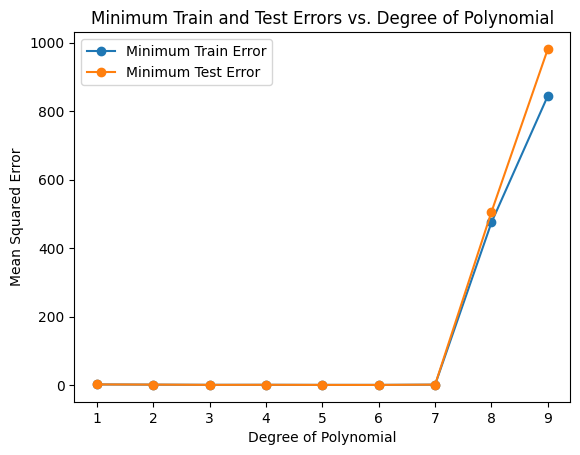

In [76]:
# Plot minimum test error vs. degree and minimum train error vs. degree
plt.plot(degrees, min_train_errors, label='Minimum Train Error', marker='o')
plt.plot(degrees, min_test_errors, label='Minimum Test Error', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Minimum Train and Test Errors vs. Degree of Polynomial')
plt.legend()

# Save the plot
plt.savefig('output/min_errors_vs_degree.png')
plt.show()
plt.close()

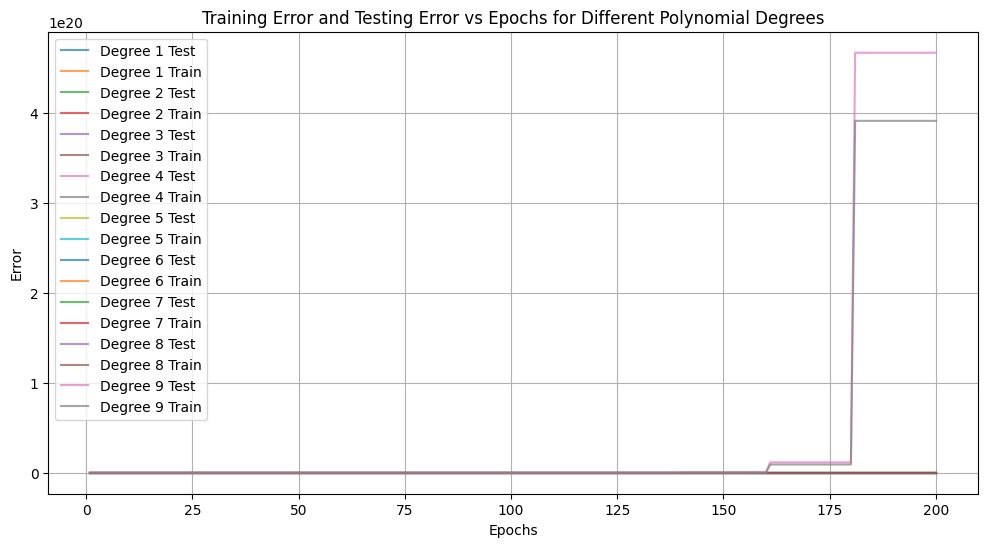

In [80]:
# Plot training and testing errors vs. epochs for all degrees
plt.figure(figsize=(12, 6))
for i, deg in enumerate(degrees):
    epochs = list(all_test_errors[i].keys())
    test_errors = list(all_test_errors[i].values())
    train_errors = list(all_train_errors[i].values())
    
    plt.plot(epochs, test_errors, label=f'Degree {deg} Test', alpha=0.7)
    plt.plot(epochs, train_errors, label=f'Degree {deg} Train', alpha=0.7)

plt.title('Training Error and Testing Error vs Epochs for Different Polynomial Degrees')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

Starting Training.....


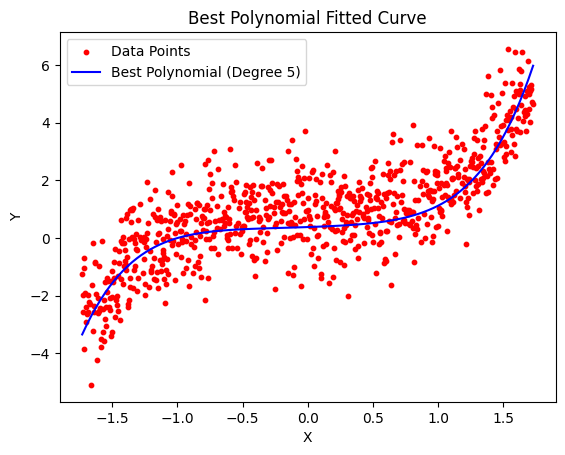

In [78]:
# Use the best degree to fit the best polynomial model
best_model = PolynomialRegressionModel(best_degree)
best_model.fit(train['X'], train['Y'], test['X'], test['Y'], lr=0.01, epochs=500)

# Generate a set of points for visualization
x_min = train['X'].min()
x_max = train['X'].max()
x_values = np.linspace(x_min, x_max, 100)
x_values = [float(x) for x in x_values]  # Ensure x_values contains float values
y_values = best_model.predict(x_values)

# Plot the data points
plt.scatter(train['X'], train['Y'], s=10, c='red', label='Data Points')

# Plot the best polynomial curve
plt.plot(x_values, y_values, label=f'Best Polynomial (Degree {best_degree})', c='blue')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Best Polynomial Fitted Curve')
plt.legend()
all_train_errors
# Save the plot
plt.savefig(f'output/best_polynomial_fit_degree_{best_degree}.png')
plt.show()
plt.close()